Forecasting_Model.ipynb



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.style.use("seaborn-v0_8")


In [12]:
df = pd.read_csv("../data/processed/daily_revenue.csv")
df.head()


,date,total_revenue,orders_count,avg_order_value
0,2016-09-04,136.23,1,68.115
1,2016-09-05,75.06,1,75.060
2,2016-09-13,0.00,1,0.000
3,2016-09-15,143.46,1,47.820
4,2016-10-02,109.34,1,109.340


In [13]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df.set_index("date", inplace=True)
df.head()


,total_revenue,orders_count,avg_order_value
date,,,
2016-09-04,136.23,1,68.115
2016-09-05,75.06,1,75.060
2016-09-13,0.00,1,0.000
2016-09-15,143.46,1,47.820
2016-10-02,109.34,1,109.340


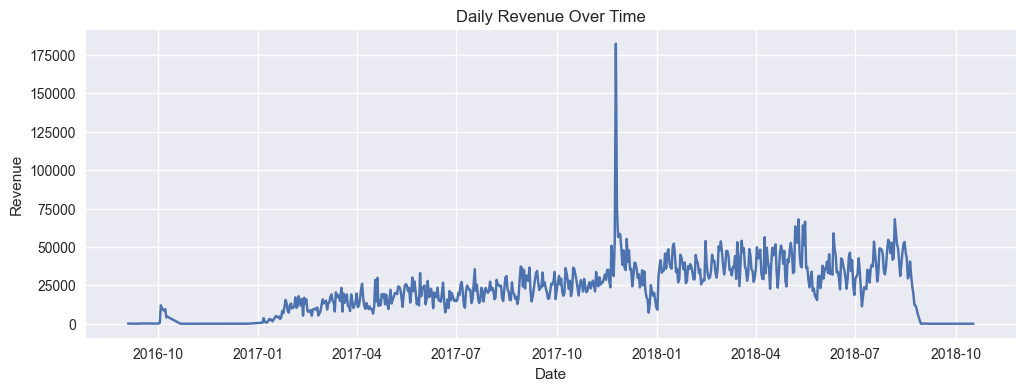

In [14]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["total_revenue"])
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


The revenue time series shows fluctuations and seasonal patterns,
indicating that time-series forecasting models are suitable.


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["total_revenue"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -3.028213732396667
p-value: 0.03234228468852216


The Augmented Dickey-Fuller test is used to check stationarity.
A p-value below 0.05 indicates stationarity.


In [16]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]


The dataset is split into training (80%) and testing (20%) sets
to evaluate forecasting performance.


In [17]:
model = SARIMAX(
    train["total_revenue"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)
print(results.summary())


e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                     total_revenue   No. Observations:                  507
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5181.714
Date:                           Mon, 15 Dec 2025   AIC                          10373.429
Time:                                   21:58:34   BIC                          10394.401
Sample:                                        0   HQIC                         10381.665
                                           - 507                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2799      0.090      3.100      0.002       0.103       0.457
ma.L1         -0.8382      0.068    -12.247

SARIMA was chosen because it can capture both trend and weekly seasonality
present in daily revenue data.


e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


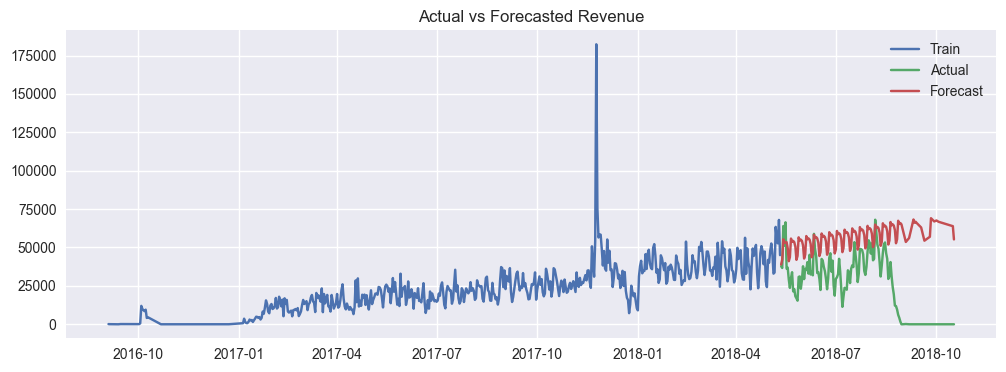

In [18]:
forecast = results.forecast(steps=len(test))

plt.figure(figsize=(12,4))
plt.plot(train.index, train["total_revenue"], label="Train")
plt.plot(test.index, test["total_revenue"], label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("Actual vs Forecasted Revenue")
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test["total_revenue"], forecast)
rmse = np.sqrt(mean_squared_error(test["total_revenue"], forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 26569.86299846017
RMSE: 32177.736730783145


Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
are used to evaluate forecast accuracy.


e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\ecom-olist-analytics\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


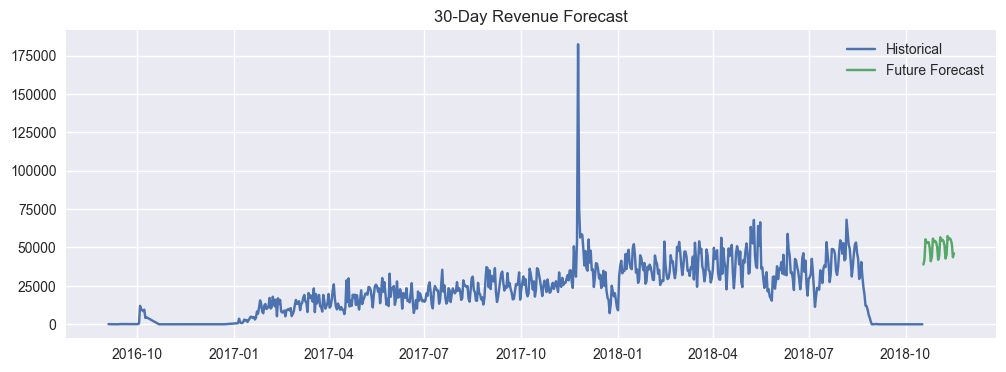

In [20]:
future_steps = 30
future_forecast = results.forecast(steps=future_steps)

plt.figure(figsize=(12,4))
plt.plot(df.index, df["total_revenue"], label="Historical")
plt.plot(
    pd.date_range(df.index[-1], periods=future_steps+1, freq="D")[1:],
    future_forecast,
    label="Future Forecast"
)
plt.legend()
plt.title("30-Day Revenue Forecast")
plt.show()


## Business Interpretation

The forecast provides an estimate of expected revenue for the next 30 days.
Such forecasts help businesses in:
- Inventory planning
- Workforce allocation
- Promotional strategy planning

Short-term forecasting is particularly useful in e-commerce environments
with frequent demand fluctuations.


## Forecasting Summary

- Historical daily revenue data was used for forecasting.
- A SARIMA model captured trend and seasonality.
- Forecast accuracy was evaluated using MAE and RMSE.
- The model provides actionable short-term revenue predictions.
